In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import pandas as pd
def read_log(path):
    rows = []
    for line in open(path).readlines():
        rows.append(json.loads(line.strip()))
    return pd.DataFrame(rows)

0     8.754095
1     5.946694
2     5.375607
3     9.401981
4     8.640982
5     7.316163
6     6.300471
7     5.674359
8     5.248606
9     4.935534
10    4.689886
11    4.489183
12    4.331118
13    4.202577
Name: train_loss, dtype: float64


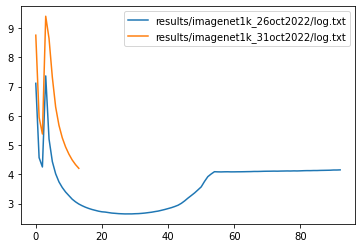

In [20]:
paths = [
    #"results/imagenet1k_24apr2022/log.txt",
    #"results/imagenet1k_25apr2022/log.txt",
    #"results/imagenet1k_26apr2022/log.txt",
    # "results/imagenet1k_27apr2022/log.txt",
    #"results/imagenet1k_28apr2022/log.txt",
    #"results/imagenet21k_29apr2022/log.txt",
    # "results/official_vitb8/log.txt",
    #"results/imagenet1k_18jun2022/log.txt",
    #"results/imagenet1k_13jul2022/log.txt",
    #"results/imagenet1k_14jul2022/log.txt",
    #"results/imagenet1k_15jul2022/log.txt",
    #"results/imagenet1k_16jul2022/log.txt",
    #"results/imagenet1k_17jul2022/log.txt",
    # "results/imagenet1k_18jul2022/log.txt",
    #"results/imagenet21k_18jun2022/log.txt",
    #"results/imagenet1k_19jun2022/log.txt",
    #"results/imagenet1k_19jun2022/log.txt",
    #"results/imagenet1k_18feb2022/log.txt",
    #"results/official_vits16/log.txt",
    #"results/laion_13apr2022/log.txt"
    #"results/imagenet1k_07nov2021/log.txt",
    #"results/official_vitb16/log.txt",
    #"results/laion_02jun2022/log.txt",
    #"results/imagenet1k_08oct2022/log.txt",
    #"results/imagenet1k_09oct2022/log.txt",
    #"results/imagenet1k_10oct2022/log.txt",
    #"results/imagenet1k_11oct2022/log.txt",
    #"results/imagenet1k_15oct2022/log.txt",
    #"results/imagenet1k_17jan2022/log.txt",
    #"results/imagenet1k_16oct2022/log.txt",
    #"results/imagenet1k_17oct2022/log.txt",
    #"results/imagenet1k_18oct2022/log.txt",
    #"results/imagenet1k_19oct2022/log.txt",
    #"results/imagenet1k_20oct2022/log.txt",
    #"results/imagenet21k_18oct2022/log.txt",
    #"results/imagenet1k_21oct2022/log.txt",
    #"results/imagenet1k_22oct2022/log.txt",
    # "results/imagenet1k_23oct2022/log.txt",
    #"results/imagenet1k_24oct2022/log.txt",
    #"results/imagenet1k_25oct2022/log.txt",
    "results/imagenet1k_26oct2022/log.txt",
    #"results/imagenet1k_27oct2022/log.txt",
    #"results/imagenet1k_28oct2022/log.txt",
    #"results/imagenet1k_30oct2022/log.txt",
    "results/imagenet1k_31oct2022/log.txt",

]
for path in paths:
    df= read_log(path)
    plt.plot(df.epoch, df.train_loss, label=path)
print(df.train_loss)
plt.legend()

In [21]:
%%time
from glob import glob
import torch
import os
rows = []
#for model in glob("results/imagenet1k_29apr2022/checkpoint.pth"):
for model in glob("results/**/checkpoint.pth"):
    """
    try:
        ckpt = torch.load(model, map_location="cpu")
    except Exception:
        continue
    """
    ckpt = None   
    row = {}
    row["path"] = model

    if ckpt and "args" in ckpt:
        args = ckpt["args"]
        row["arch"] = args.arch + "_" + str(args.patch_size)
        
    for evaluation in glob(os.path.join(os.path.dirname(model), "eval*", "log.txt")):
        ev = read_log(evaluation)
        if len(ev):
            final = ev.iloc[0].to_dict() if 'eval_fast' in evaluation else ev.iloc[-1].to_dict()
            ds = os.path.basename(os.path.dirname(evaluation))
            for k, v in final.items():
                if "acc" in k:
                    if type(v) == list and len(v) == 1:
                        v = v[0]
                    row[ds+"_"+k] = v
        
    rows.append(row)
df = pd.DataFrame(rows)
df.to_csv("results.csv", index=False)

CPU times: user 802 ms, sys: 365 ms, total: 1.17 s
Wall time: 6.88 s


In [22]:
#m = "eval_fast_linear_cifar10_accuracy"
#m = "eval_linear_flowers_test_acc1"
#m = "eval_linear_cifar10_test_acc1"
#m = "eval_linear_flowers_test_acc1"
m = "eval_linear_imagenet1k_test_acc1"
#m = "eval_linear_cars_test_acc1"

d = df[["path", m]]
#df.sort_values(by="eval_linear_imagenet1k_test_acc1", ascending=False)
#df = df.sort_values(by="eval_fast_linear_cifar10_accuracy", ascending=False)
d = d.sort_values(by=m, ascending=False)
d

,path,eval_linear_imagenet1k_test_acc1
13,results/imagenet21k_18jun2022/checkpoint.pth,80.142
45,results/official_vitb8/checkpoint.pth,79.824
17,results/official_vits8/checkpoint.pth,79.588
64,results/imagenet1k_18feb2022/checkpoint.pth,79.360
51,results/imagenet1k_19jun2022/checkpoint.pth,78.970
...,...,...
61,results/imagenet1k_25jun2022/checkpoint.pth,NaN
62,results/imagenet1k_15jul2022/checkpoint.pth,NaN
63,results/imagenet1k_15oct2022/checkpoint.pth,NaN
65,results/laion_18mar2022/checkpoint.pth,NaN


In [70]:
cols = ["eval_linear_cifar10_test_acc1", "eval_linear_cifar100_test_acc1", "eval_linear_flowers_test_acc1", "eval_linear_cars_test_acc1", "eval_linear_imagenet1k_test_acc1"]
df[df.path=="results/imagenet21k_19feb2022/checkpoint.pth"].dropna(axis=1).filter(axis=1, regex="acc1")[cols].round(2)

,eval_linear_cifar10_test_acc1,eval_linear_cifar100_test_acc1,eval_linear_flowers_test_acc1,eval_linear_cars_test_acc1,eval_linear_imagenet1k_test_acc1
5,98.06,92.9,99.61,47.8,78.7


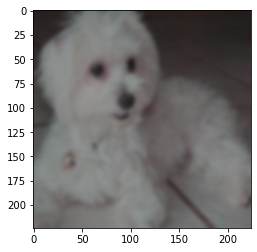

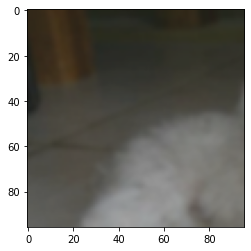

In [76]:
import wds
import utils
from main_dino import DataAugmentationDINO
from PIL import Image
import torch
import matplotlib.pyplot as plt
class wds_args:
    distributed = False
    batch_size = 1
    train_data = '/p/scratch/ccstdl/cherti1/imagenet-1K-webdataset/train'
    workers = 4
    world_size = 1
    rank = 0
    train_num_samples = 1000
    resampled = True
transform = DataAugmentationDINO(
    (0.4,1),
    (0.05,0.4),
    1
)
mean = torch.Tensor([0.485, 0.456, 0.406])
std = torch.Tensor([0.229, 0.224, 0.225])
data_loader = wds.get_wds_dataset(wds_args, transform, True,).dataloader
for x in data_loader:
    fig = plt.figure()
    plt.imshow(x[0][0].permute(1,2,0) * std + mean)
    plt.show()
    fig = plt.figure()

    plt.imshow(x[2][0].permute(1,2,0) * std + mean)
    plt.show()
    break